## Importing Data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
# Reading csv file and creating Pandas DataFrame
df = pd.read_csv("Data/credit_score.csv")
df

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CZQHJC9HDH,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,...,0.2041,0.0543,High,1,1,1,1,1,418,0
996,CZRA4MLB0P,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,...,0.8333,0.1087,No,1,0,0,1,0,589,1
997,CZSOD1KVFX,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,...,0.2500,0.3448,No,1,0,0,1,0,499,0
998,CZWC76UAUT,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,...,5.0002,0.0662,No,1,1,0,1,0,507,0


## DATA analysis and preprocessing

In [57]:
df["INCOME"].max()

662094

In [58]:
# Main info about DataFrame
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 87 entries, CUST_ID to DEFAULT
dtypes: float64(51), int64(34), object(2)
memory usage: 679.8+ KB


In [59]:
# Main info about DataFrame and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [60]:
# Calculate the sum of missing values for each column

missing_values = df.isna()

sum_missing_values = missing_values.sum()

print(sum_missing_values)

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64


In [61]:
# Calculate the sum of duplicate values

duplicates = df.duplicated()
sum_of_duplicates = duplicates.sum()

print("Sum of duplicates:", sum_of_duplicates)

Sum of duplicates: 0


In [62]:
# Dropping "DEFAULT" column
df = df.drop("DEFAULT", axis=1)

In [63]:
# Printing "CAT_GAMBLING" columns' unique values
df["CAT_GAMBLING"].unique()

array(['High', 'No', 'Low'], dtype=object)

In [64]:
# Labeling "CAT_GAMBLING" columns' values with {0, 1, 2}
df["CAT_GAMBLING"] = df["CAT_GAMBLING"].map({"No": 0, "Low": 1, "High":2})
df["CAT_GAMBLING"]

0      2
1      0
2      2
3      2
4      2
      ..
995    2
996    0
997    0
998    0
999    0
Name: CAT_GAMBLING, Length: 1000, dtype: int64

In [65]:
# Dropping "CUST_ID" column because of no needing it
df = df.drop("CUST_ID", axis=1)

In [66]:
# Printing numeric columns' mean values
df.mean(numeric_only=True)

INCOME                 121610.019000
SAVINGS                413189.597000
DEBT                   790718.045000
R_SAVINGS_INCOME            4.063477
R_DEBT_INCOME               6.068449
                           ...      
CAT_CREDIT_CARD             0.236000
CAT_MORTGAGE                0.173000
CAT_SAVINGS_ACCOUNT         0.993000
CAT_DEPENDENTS              0.150000
CREDIT_SCORE              586.712000
Length: 85, dtype: float64

In [67]:
df.to_csv("Data/cleaned_data.csv", index=False)

In [68]:
# Taking all feature columns
X = df.iloc[:,:-1]
X.shape

(1000, 84)

In [69]:
# Taking target column
y = df.iloc[:, -1]
y.shape

(1000,)

## Visualisation

In [70]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))

# Creating boxplot for the 'SAVINGS' column
sns.boxplot(x=df['INCOME'], color='skyblue')

# Adding title and labels to the plot
plt.title('Boxplot of Income')
plt.xlabel('Income')

# Displaying the plot
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [71]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))

# Creating boxplot for the 'SAVINGS' column
sns.boxplot(x=df['SAVINGS'], color='skyblue')

# Adding title and labels to the plot
plt.title('Boxplot of Income')
plt.xlabel('Income')

# Displaying the plot
plt.show()



NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

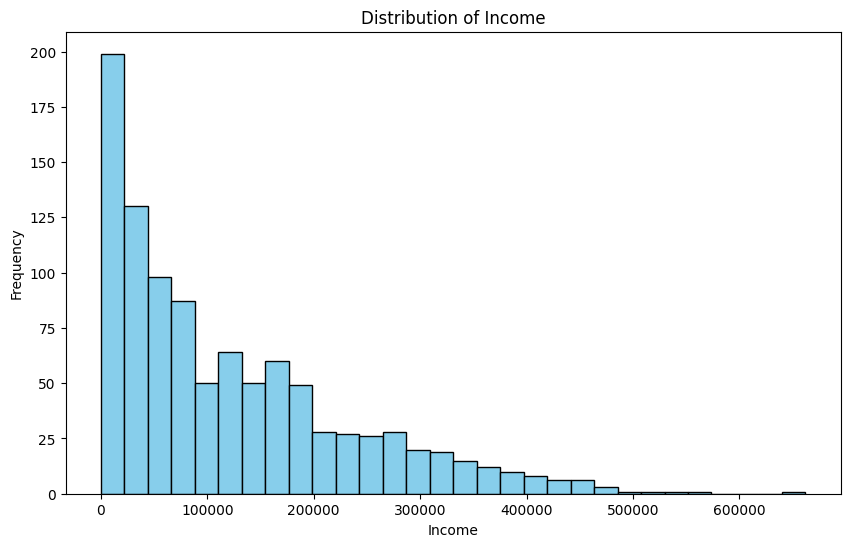

In [72]:
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating histogram of the 'INCOME' column with 30 bins
plt.hist(df['INCOME'], bins=30, color='skyblue', edgecolor='black')

# Adding title and labels to the plot
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


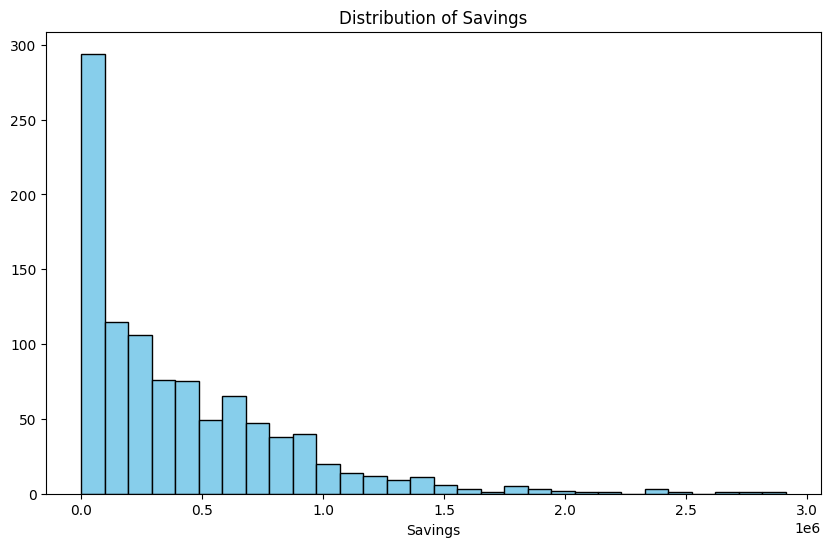

In [73]:
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating histogram of the 'SAVINGS' column with 30 bins
plt.hist(df['SAVINGS'], bins=30, color='skyblue', edgecolor='black')

# Adding title and labels to the plot
plt.title('Distribution of Savings')
plt.xlabel('Savings')

# Displaying the plot
plt.show()

In [74]:
# Selecting features for the pairplot
selected_features = ['INCOME', 'SAVINGS', 'DEBT']

# Creating a pairplot with kernel density estimates on the diagonal
sns.pairplot(df[selected_features], diag_kind='kde')

# Adding a title to the plot
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)

# Displaying the plot
plt.show()

NameError: name 'sns' is not defined

NameError: name 'sns' is not defined

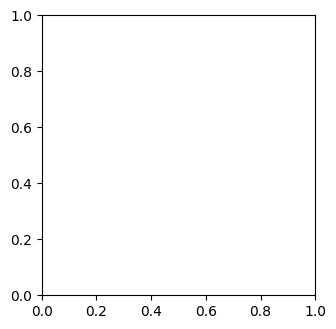

In [75]:
# List of categorical features
categorical_features = ['CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

# Setting the figure size
plt.figure(figsize=(12, 8))

# Looping over each categorical feature
for i, feature in enumerate(categorical_features, 1):
    # Creating subplots
    plt.subplot(2, 3, i)
    
    # Creating count plot for the current feature
    sns.countplot(x=feature, data=df, palette='Set3')
    
    # Adding title to the subplot
    plt.title(f'Count Plot of {feature}')
    
    # Adding labels to x and y axis
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjusting layout to prevent overlapping of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


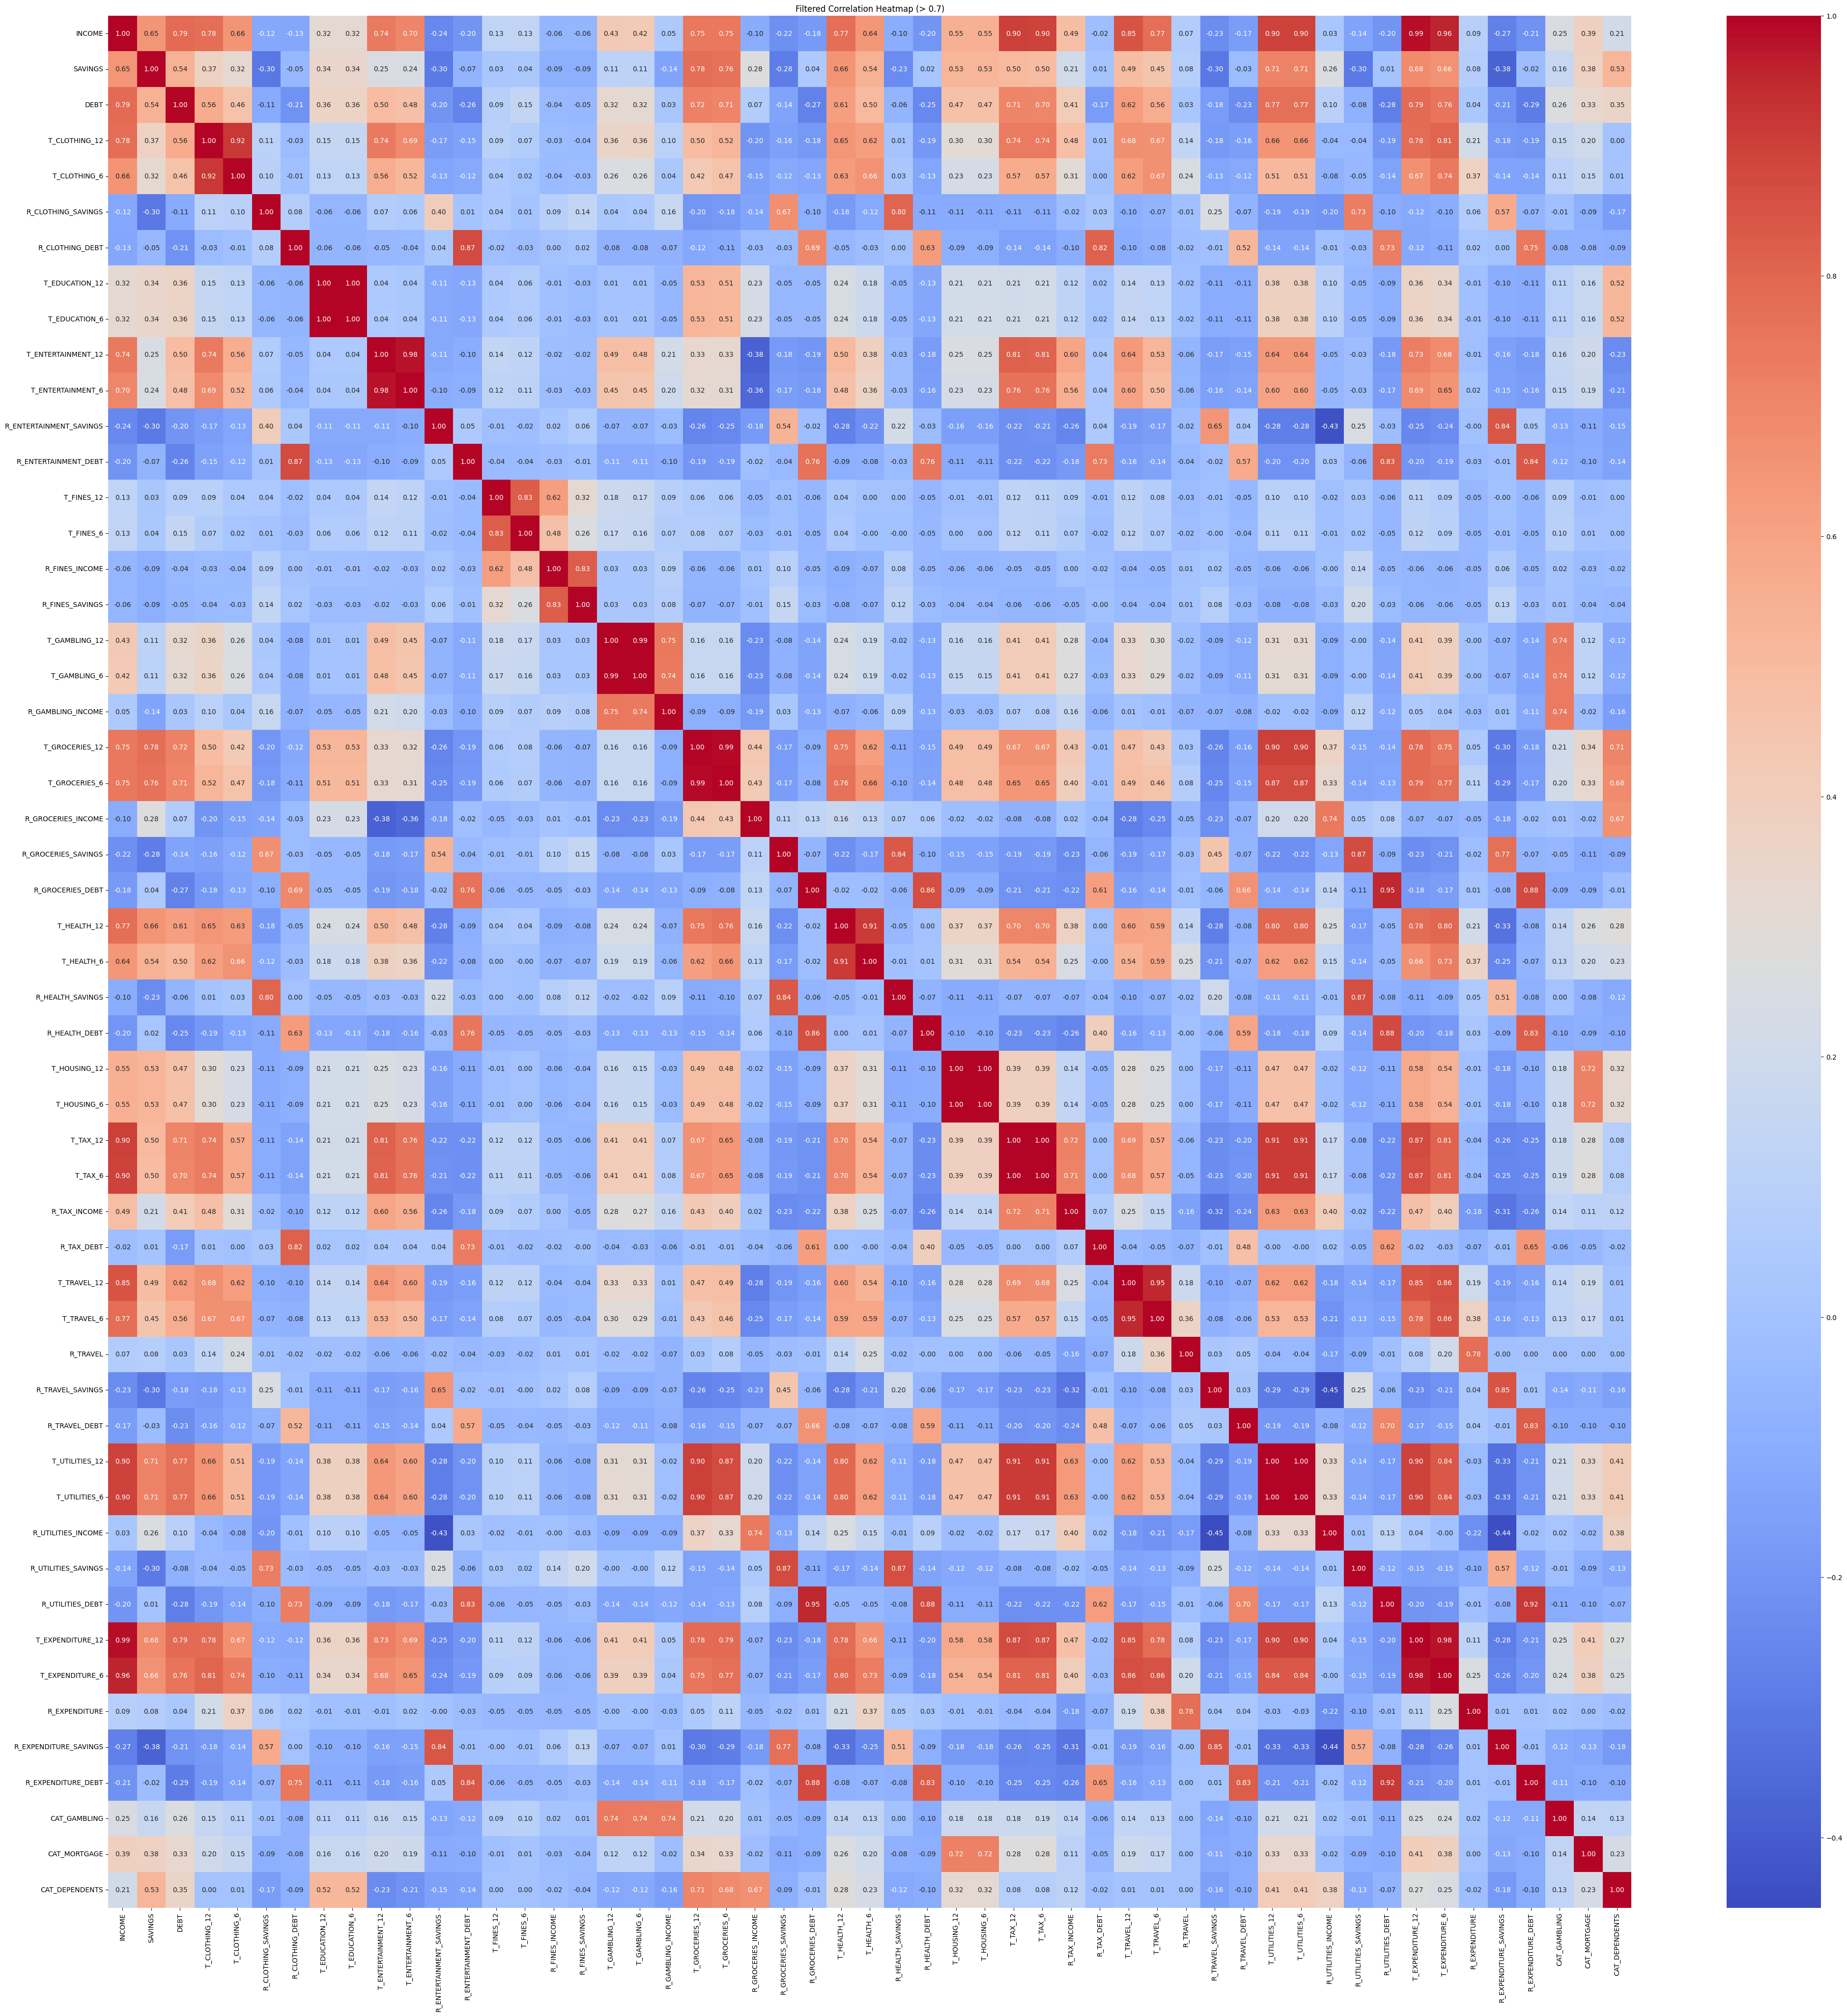

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Find features with correlation greater than 0.7 (excluding self-correlation)
# We use stack() to convert the matrix to a Series, allowing easier filtering
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']] 
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > 0.7]  

# Get unique feature names from these pairs
high_corr_features = pd.unique(high_corr_pairs[['level_0', 'level_1']].values.ravel('K'))

# Filter the original correlation matrix to include only these features
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

plt.figure(figsize=(50, 50))  
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Filtered Correlation Heatmap (> 0.7)')
plt.show()


### Feature Selection and Importance


In [77]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import ExtraTreesClassifier


# clf = ExtraTreesClassifier(random_state=0)

# param_grid = {
#     'n_estimators': np.arange(50,150,50),
#     'max_depth': np.arange(1,90,15),
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')

# grid_search.fit(X, y)

# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: {:.2f}".format(grid_search.best_score_))


### Preprocessing class implementation

In [78]:
data = X.copy() 
data['CREDIT_SCORE'] = y

In [79]:
from Models.preprocessing.check_nans import CheckNans
from Models.preprocessing.log_transformation import LogTransformation
from Models.preprocessing.remove_outliers import RemoveOutliers
from Models.preprocessing.scaling import Scaling

In [80]:
check_nans = CheckNans(name="CheckNans", data=data)
log_transform = LogTransformation(name="LogTransform", data=data)
remove_outliers = RemoveOutliers(name="RemoveOutliers", data=data)
scaling = Scaling(name="Scaling", data=data)

In [81]:
data = check_nans.apply()

2024-02-24 16:29:58.051 | INFO     | Models.preprocessing.check_nans:apply:15 - <Models.preprocessing.check_nans.CheckNans object at 0x000001984BEEAE90> is checking nans in dataframe
2024-02-24 16:29:58.055 | INFO     | Models.preprocessing.check_nans:apply:18 - No nans in dataframe


In [82]:
# transformed_df = log_transform.apply(column='CAT_SAVINGS_ACCOUNT')
# data["CAT_SAVINGS_ACCOUNT"] = transformed_df

In [85]:
data = remove_outliers.transform(1.5)

2024-02-24 16:30:14.689 | INFO     | Models.preprocessing.remove_outliers:transform:11 - <Models.preprocessing.remove_outliers.RemoveOutliers object at 0x000001984BB86A10> is removing outliers from dataframe
2024-02-24 16:30:14.975 | INFO     | Models.preprocessing.remove_outliers:transform:29 - Removed outliers from dataframe. Original rows: 1000, After cleaning: 14


AttributeError: 'RemoveOutliers' object has no attribute 'mark_as_trained'

In [86]:
data = scaling.apply(target_column='CREDIT_SCORE')

AttributeError: 'Scaling' object has no attribute 'apply'

In [87]:
data.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,2,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473


In [88]:
X_scaled = data.drop('CREDIT_SCORE', axis=1)
y = data['CREDIT_SCORE']

In [89]:

from Models.preprocessing.check_outliers import CheckOutliers

iso_forest = CheckOutliers(name="CheckOutliers")
iso_forest.apply(X_scaled)


TypeError: Can't instantiate abstract class CheckOutliers with abstract method transform

In [90]:
from Models.preprocessing.check_nans import CheckNans

preprocc = CheckNans(df)
preprocc.transform()

TypeError: CheckNans.__init__() missing 1 required positional argument: 'data'

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression().fit(X_train, y_train)
linear_regression.score(X_train,y_train)

0.8426210220556393

In [ ]:
linear_regression.coef_

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
y_pred = linear_regression.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 891.2469789190637
Mean Absolute Error (MAE): 21.628652004273608
R-squared: 0.775465513015505


In [101]:
from sklearn.model_selection import GridSearchCV
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_grid = {
    'fit_intercept': [True, False],  
    'n_jobs': [-1, 1]  
}
grid_search = GridSearchCV(LinearRegression(), param_grid ,scoring=mse_scorer, cv=5)
grid_search.fit(X_scaled, y)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

Best Hyperparameters: {'fit_intercept': False, 'n_jobs': -1}
Best Negative Mean Squared Error: -859.7808495595575


In [102]:
linear_regression = LinearRegression(fit_intercept=False, n_jobs=-1).fit(X_train, y_train)
linear_regression.score(X_train,y_train)

0.8425732325201999

In [103]:
from sklearn.linear_model import Lasso

model = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  
    'fit_intercept': [True, False],          
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(model, param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.387e+05, tolerance: 3.194e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+05, tolerance: 3.195e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True}
Best Negative Mean Squared Error: -763.4500518191774


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.308e+06, tolerance: 2.808e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.570e+05, tolerance: 4.017e+02
  model = cd_fast.enet_coordinate_descent(


In [105]:
lasso_regression = Lasso(fit_intercept=True, alpha=0.1).fit(X_train, y_train)
lasso_regression.score(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.846e+05, tolerance: 3.221e+02
  model = cd_fast.enet_coordinate_descent(


0.8332691985127629

In [107]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [5, 10, 15],  
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],   
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(model, param_grid, scoring=mse_scorer, cv=5, n_jobs=-1)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [108]:
print("Best Hyperparameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 15}
Best Negative Mean Squared Error: -894.2989628604897


In [112]:
random_regression = RandomForestRegressor(max_depth=None, min_samples_leaf=4, min_samples_split= 2, n_estimators=100).fit(X_train, y_train)
random_regression.score(X_train, y_train)

0.9410334685108495

In [113]:
y_pred = random_regression.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 893.3157790760747
Mean Absolute Error (MAE): 21.77861768894913
R-squared: 0.774944314074117
